# **Regresión Logística**



El objetivo de la regresión logística es modelar la relación entre un conjunto de variables explicativas dadas por variable *X* y una variable objetivo *y*; donde *X* es continua mientras que la variable y es discreta de tipo nominal.

La función de hipótesis para este modelo se define como *y* = sigmoide(ϴ X) , asumiendo que *X* incluye un término de BIAS *y* donde sigmoide(z)=1/(1+exp(-z)).

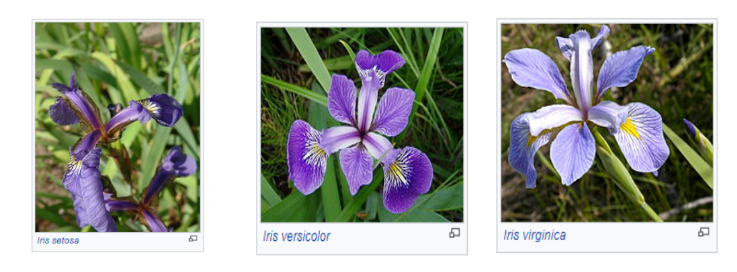

En este laboratorio, nuestro objetivo será aplicar la regresión logística para la clasificación de la planta iris basadas en características visuales conocidas por cada caso y la cual puede obtenerse [aquí](https://archive.ics.uci.edu/dataset/53/iris)

A continuación, se indican las 4 características de las 150 muestras en la siguiente descripción:


*   Longitud de sépalo: en centímetros
*   Ancho de sépalo: en centímetros
*   Longitud de pétalo: en centímetros
*   Ancho de pétalo: en centímetros
*   Clase: Iris Setosa , Iris Versicolour e Iris Virginica

**En este laboratorio debe realizar las siguientes tareas:**

1.   Cargue base de datos Iris desde librería sklearn, además de indicar variables de entrada y salidas. Solo considere como entradas a la longitud y ancho de los pétalos. Muestre 5 primeras filas de base de datos.

In [16]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

print(X[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]]


2.   Aplique método hold-out usando 65% para entrenar y resto a testeo. Luego escale los datos. Muestre 5 primeras filas de nueva base de datos.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std[:5])
print(X_test_std[:5])

[[ 0.03858787 -0.11326148]
 [ 0.64407699  0.7809774 ]
 [ 0.75416592  0.39773217]
 [ 0.42389913  0.65322899]
 [ 0.69912146  0.90872581]]
[[ 0.75416592  1.54746786]
 [ 0.1486768  -0.24100989]
 [-1.2824793  -1.26299717]
 [ 1.41469951  0.7809774 ]
 [-1.22743483 -1.26299717]]


3.   Grafique y plotee función sigmoide usando como rango para variable de entrada a [-7,7] usando librería matplotlib. Muestre el gráfico resultante.




In [17]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

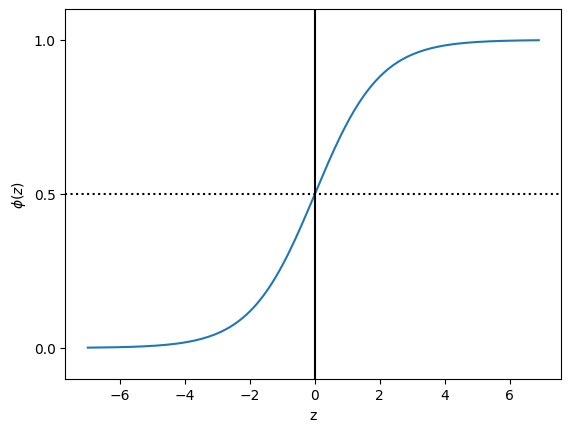

In [18]:
plt.plot(z, phi_z)

plt.axvline(0.0, color="k")
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')

plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)

plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.show()

4.   Ajuste modelo de regresión logística usando librería sklearn usando coeficiente de regularización igual a 1e3. Muestre el gráfico con líneas de decisión.



In [10]:
!pip install mlxtend

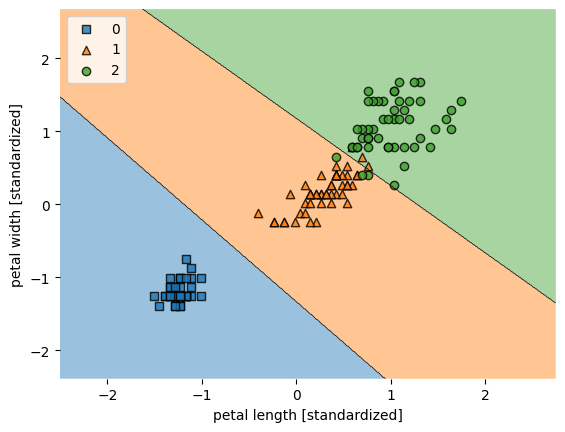

In [21]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, lr)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.show()

5.   Muestre predicciones de probabilidades dadas clases para filas con índices 0, 5 y 13 de set de testeo. Que indican los números resultantes para cada dato.




In [37]:
lr.predict_proba(X_test_std[0,:].reshape(1, -1)) #Fila 0

array([[8.28276315e-20, 1.87095285e-04, 9.99812905e-01]])

In [38]:
lr.predict_proba(X_test_std[5,:].reshape(1, -1)) #Fila 5

array([[1.14001010e-24, 1.62556008e-06, 9.99998374e-01]])

In [39]:
lr.predict_proba(X_test_std[13,:].reshape(1, -1)) #Fila 13

array([[4.08869318e-10, 9.39020213e-01, 6.09797870e-02]])

**^ Tomando las lineas 0, 5 y 13, se calcula cual es la probabilidad de cada fila de ser cada clase (Iris Setosa , Iris Versicolour e Iris Virginica)**
*   La fila 0 tiene mayor probabilidad de ser Clase 2 (Iris Virginica)
*   La fila 5 tiene mayor probabilidad de ser Clase 2 (Iris Virginica)
*   La fila 13 tiene mayor probabilidad de ser Clase 1 (Iris Versicolour)



---



6.   Aplique regularización considerando los valores de serie geométrica: {1e-5, 1e-4, … 1e4, 1e5}. Muestre grafico que muestre la relación resultante entre el peso y la constante de regularización. Explique el gráfico resultante.



In [27]:
weights, params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)

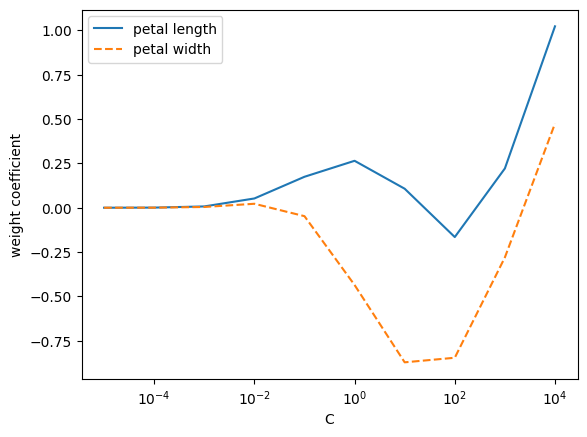

In [29]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()